# Machine Learning : Projet Real Estate

##### Membres : Mohamed Bouchafaa - Damien Delprat - Tanguy Dugas Du Villard - Zakaria Kabara - Valentin Lhote - Omar Mousteau - Marijan Sorić

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import tensorflow as tf
import random

# Visualisation des données

Penser à mettre les fichiers datas dans le meme dossier que le notebook

In [2]:
import time as t

In [3]:
T1=t.time()
X_train_path = "X_train_J01Z4CN.csv"   # Ouverture et conversion en dataframe du X d'entrainement
X_train= pd.read_csv(X_train_path)
print(X_train.dtypes) # Liste des paramètres dans le X ainsi que leur type
X_train.shape # 5 premières lignes de la Dataframe
X_train.head()
T2=t.time()
print(T2-T1)

id_annonce                       int64
property_type                   object
approximate_latitude           float64
approximate_longitude          float64
city                            object
postal_code                      int64
size                           float64
floor                          float64
land_size                      float64
energy_performance_value       float64
energy_performance_category     object
ghg_value                      float64
ghg_category                    object
exposition                      object
nb_rooms                       float64
nb_bedrooms                    float64
nb_bathrooms                   float64
nb_parking_places              float64
nb_boxes                       float64
nb_photos                      float64
has_a_balcony                  float64
nb_terraces                    float64
has_a_cellar                   float64
has_a_garage                   float64
has_air_conditioning           float64
last_floor               

In [4]:
y_train_path = "y_train_OXxrJt1.csv"    # Ouverture et conversion en dataframe du y d'entrainement
y_train = pd.read_csv(y_train_path)
print(y_train.price.min(), y_train.price.max())#prix min et max des biens immobiliers
y_train.head(5)

24465.0 2299000.0


,id_annonce,price
0,35996577,355000.0
1,35811033,190000.0
2,35731841,39000.0
3,35886765,299000.0
4,35781137,478000.0


In [5]:
"""Création d'un unique dataframe combinant les prix et les attributs de chaque bien"""
df=X_train.copy()
df.insert(1, 'price', y_train['price'])
df=df.rename(columns={"approximate_latitude": "lat","approximate_longitude":"long"})

<AxesSubplot: >

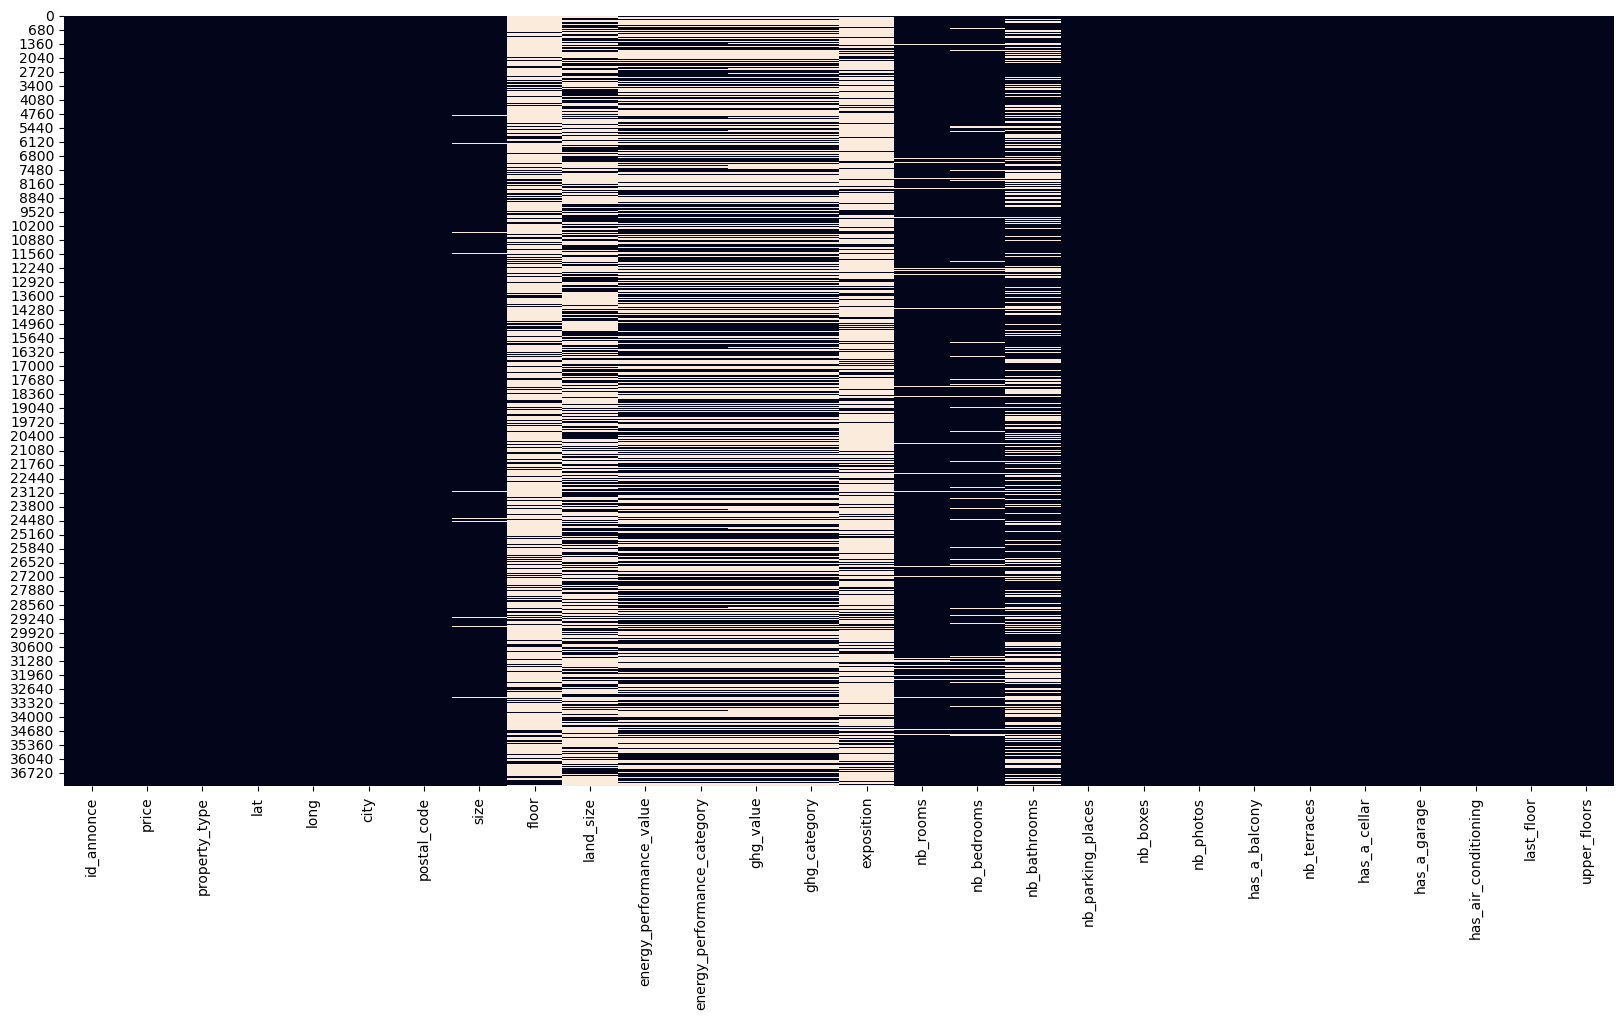

In [6]:
"""Analyse des valeurs manquantes"""
df.isna()
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(),cbar=False)

In [7]:
""" % de NaN par colonne"""
print((df.isna().sum()/df.shape[0]).sort_values(ascending=True))

id_annonce                     0.000000
has_air_conditioning           0.000000
has_a_garage                   0.000000
has_a_cellar                   0.000000
nb_terraces                    0.000000
has_a_balcony                  0.000000
nb_photos                      0.000000
nb_boxes                       0.000000
nb_parking_places              0.000000
last_floor                     0.000000
upper_floors                   0.000000
price                          0.000000
property_type                  0.000000
lat                            0.000000
long                           0.000000
city                           0.000000
postal_code                    0.000000
size                           0.013702
nb_rooms                       0.041908
nb_bedrooms                    0.073137
nb_bathrooms                   0.355197
energy_performance_category    0.489724
energy_performance_value       0.489724
ghg_value                      0.504121
ghg_category                   0.504121


In [32]:
from sklearn.impute import KNNImputer
imputer = KNNImputer()
imputer.fit_transform(df)

ValueError: could not convert string to float: 'appartement'

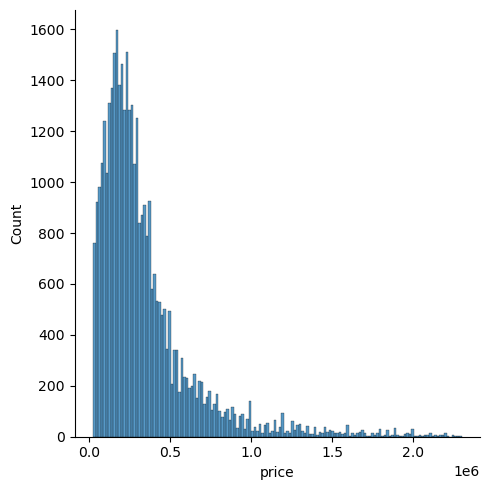

In [8]:
"""Répartition des prix des différents biens"""
sns.displot(df['price'])

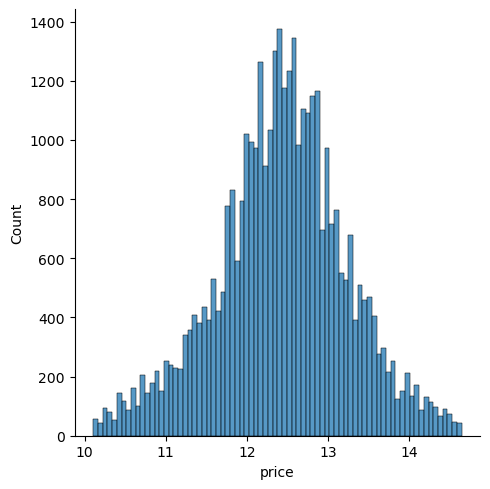

In [34]:
"""Répartition des prix des différents biens"""
sns.displot(np.log(df['price']))

In [9]:
df[df['property_type']=='appartement']['land_size'].dropna()

54        125.0
104       150.0
163       852.0
170        11.0
175         3.0
          ...  
37075     230.0
37137      25.0
37176     125.0
37236      25.0
37308    3259.0
Name: land_size, Length: 646, dtype: float64

In [10]:
""""Visualisation des categorical values"""
for col in df.select_dtypes('object'):
    print(f'{col:-<50}{df[col].unique()}')
    if col=='city':
      print('Il y a {} villes différentes'.format(df['city'].nunique()))

property_type-------------------------------------['appartement' 'maison' 'propriété' 'divers' 'duplex' 'terrain' 'villa'
 'viager' 'terrain à bâtir' 'ferme' 'parking' 'moulin' 'loft' 'manoir'
 'chalet' 'péniche' 'atelier' 'château' 'chambre' 'gîte'
 'hôtel particulier' 'hôtel']
city----------------------------------------------['villeneuve-loubet' 'venissieux' 'moutiers' ... 'vantoux' 'satillieu'
 'le-donzeil']
Il y a 8643 villes différentes
energy_performance_category-----------------------[nan 'D' 'B' 'C' 'A' 'E' 'F' 'G']
ghg_category--------------------------------------[nan 'E' 'B' 'C' 'D' 'A' 'F' 'G']
exposition----------------------------------------[nan 'Sud' 'Sud-Est' 'Ouest' 'Nord-Est' 'Est-Ouest' 'Sud-Ouest' 'Est'
 'Nord-Ouest' 'Sud-Nord' 'Nord' 'Ouest-Est' 'Nord-Sud']


<AxesSubplot: ylabel='property_type'>

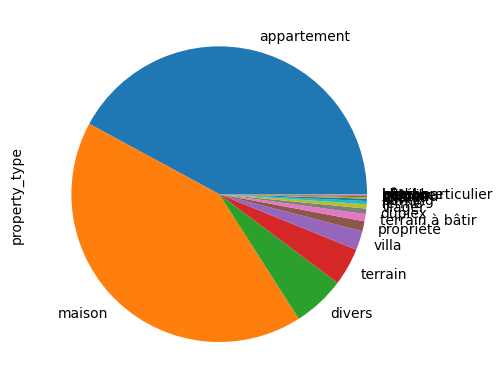

In [11]:
"""Répartition des types de bien"""
df['property_type'].value_counts().plot.pie()

In [12]:
"""Nombre de biens en fonction du type de bien"""
liste_type=list(df['property_type'].unique())
for col in liste_type:
  nb=df[df['property_type']==col].shape[0]
  print('Il y a {} {}'.format(nb,col))

Il y a 15733 appartement
Il y a 15675 maison
Il y a 408 propriété
Il y a 2137 divers
Il y a 220 duplex
Il y a 1534 terrain
Il y a 781 villa
Il y a 177 viager
Il y a 298 terrain à bâtir
Il y a 130 ferme
Il y a 96 parking
Il y a 17 moulin
Il y a 54 loft
Il y a 15 manoir
Il y a 48 chalet
Il y a 8 péniche
Il y a 2 atelier
Il y a 21 château
Il y a 4 chambre
Il y a 3 gîte
Il y a 6 hôtel particulier
Il y a 1 hôtel


<AxesSubplot: ylabel='exposition'>

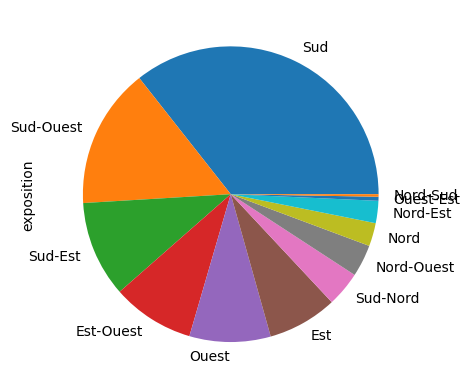

In [13]:
"""Exposition des biens"""
df['exposition'].value_counts().plot.pie()

<AxesSubplot: ylabel='energy_performance_category'>

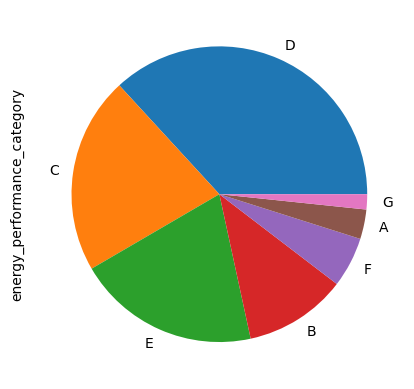

In [14]:
"""Performance energetique des biens"""
df['energy_performance_category'].value_counts().plot.pie()

<AxesSubplot: ylabel='ghg_category'>

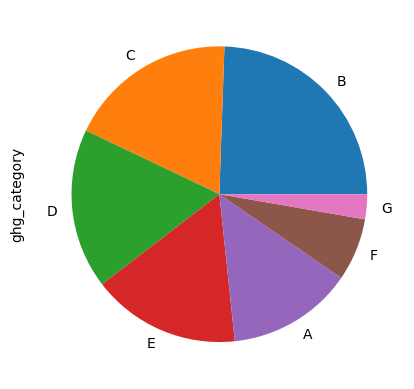

In [15]:
"""ghg category (emissions de co2) des biens"""
df['ghg_category'].value_counts().plot.pie()

On regarde les liens entre prix et d'autres valeurs numériques (size, energy...) en ne sélectionnant qu'un type de bien pour garder du sens et en jouant sur la taille du bien

In [16]:
type_bien='maison'
seuil_size=150
df_num=df[['price','property_type','lat','long','size','land_size','energy_performance_value','ghg_value','nb_photos','postal_code']]
df_num['dpt']=df['postal_code']//1000
df_num=df_num[(df_num['property_type']==type_bien)& (df_num['size']<seuil_size)]
df_num.drop(columns=['property_type', 'postal_code'])

C:\Users\valen\AppData\Local\Temp\ipykernel_2864\4238430536.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num['dpt']=df['postal_code']//1000


,price,lat,long,size,land_size,energy_performance_value,ghg_value,nb_photos,dpt
2,39000.0,47.966791,-1.220451,61.0,370.0,NaN,NaN,4.0,35
3,299000.0,47.289292,-1.878805,142.0,764.0,217.0,44.0,8.0,44
7,241000.0,48.698043,-3.093175,120.0,25700.0,193.0,6.0,17.0,22
8,334400.0,42.707206,3.024995,110.0,392.0,89.0,17.0,8.0,66
13,231900.0,43.458890,3.748539,100.0,78.0,82.0,19.0,11.0,34
...,...,...,...,...,...,...,...,...,...
37346,221000.0,49.411566,2.822668,84.0,120.0,141.0,33.0,6.0,60
37349,314000.0,45.922608,5.224517,120.0,524.0,NaN,NaN,8.0,1
37350,260000.0,50.528045,2.639937,115.0,495.0,275.0,15.0,10.0,62
37355,93075.0,43.107599,0.725940,125.0,202.0,NaN,NaN,7.0,31


In [17]:
"""Tracé de nuages de points entre ces categories"""
#sns.pairplot(df_num.dropna())

'Tracé de nuages de points entre ces categories'

<AxesSubplot: >

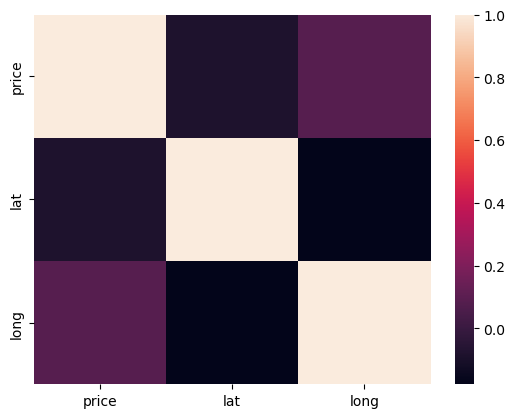

In [18]:
"""Représentation des corrélations"""
sns.heatmap(df_num[['price','lat','long']].dropna().corr())

Corrélation de 0.64 entre nb_photos et prix

# Pre-Processing

Première idée : on ne séléctionne que les appartements de moins de 100m2 et certains features qui semblent "clés" pour estimer le prix.

In [19]:
"""On charge X_test et y_test"""
X_test_path = "X_test_BEhvxAN.csv"  
y_test_path= "y_random_MhJDhKK.csv"
X_test= pd.read_csv(X_test_path)
y_test=pd.read_csv(y_test_path)
X_test

,id_annonce,property_type,approximate_latitude,approximate_longitude,city,postal_code,size,floor,land_size,energy_performance_value,...,nb_parking_places,nb_boxes,nb_photos,has_a_balcony,nb_terraces,has_a_cellar,has_a_garage,has_air_conditioning,last_floor,upper_floors
0,35160615,maison,49.371670,3.533991,brenelle,2220,143.0,NaN,800.0,299.0,...,0.0,1.0,11.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,35830639,propriété,49.037190,-0.982385,torigni-sur-vire,50160,470.0,NaN,28559.0,NaN,...,0.0,1.0,20.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2,36016657,appartement,47.097180,6.149253,ornans,25290,135.0,NaN,NaN,NaN,...,0.0,0.0,6.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
3,35759225,appartement,43.699670,7.245556,nice,6000,3637.0,3.0,NaN,210.0,...,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,35252229,divers,43.849435,6.215461,moustiers-sainte-marie,4360,600.0,NaN,NaN,NaN,...,0.0,0.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9334,36052217,villa,43.117121,5.790808,sanary-sur-mer,83110,96.0,NaN,NaN,NaN,...,1.0,0.0,8.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9335,35823719,appartement,43.099598,5.874048,la-seyne-sur-mer,83500,71.0,3.0,NaN,51.0,...,0.0,1.0,8.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
9336,35793053,appartement,45.977895,-1.096506,fouras,17450,70.0,NaN,NaN,NaN,...,1.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9337,36049283,maison,47.284067,-2.197979,saint-nazaire,44600,120.0,NaN,362.0,65.0,...,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Sélection des biens sur lesquels on travaille

In [20]:
"""On ne garde que les lignes des appartements de moins de 100m2"""
df_test=X_test.copy()
df_train=X_train.copy()
df_test.insert(1,'price',y_test['price'])
df_train.insert(1,'price',y_train['price'])
df_test=df_test[(df_test['property_type']=='appartement')&(df_test['size']<50)]
df_train=df_train[(df_train['property_type']=='appartement')&(df_train['size']<50)]




#### Variables utilisées dans la régression

In [21]:
key_columns=['price','size']

In [22]:
df_train=df_train[key_columns]
df_test=df_test[key_columns]

### Fonction encodage

In [23]:
"""Methode d'encodage One-Hot pour transformer les variables categorielles en entiers"""
def encodage (df):
    if 'exposition' and 'departement' in key_columns:
        df_dummies=pd.get_dummies(df, prefix=['Exp','Dpt'], prefix_sep='_', columns=['exposition', 'departement'])
    return df_dummies

### Fonction Feature_engineering

In [24]:
"""On créé de nouvelles nouvelles variables"""
def feature_engineering(df):
    if 'departement'in key_columns:
        df['departement']=df.postal_code//1000
        df=df.drop(['postal_code'],axis=1)
    return df

### Fonction imputation

In [25]:
"""Fonction pour gérer les NaN"""
def imputation(df):
    return df.dropna(axis=0)

### Fonction preprocessing

In [26]:
def preprocessing(df):
    df=feature_engineering(df)
    #df=encodage(df)
    df=imputation(df)
    
    X=df.drop(['price'], axis=1)
    y=df['price']
    
    
    return X, y

### Trainset - Testset

Le split du train/test set a déjà été fait pour nous, il suffit d'appliquer la fonction preprocessing a df_train et df_test

In [27]:
X_train, y_train=preprocessing(df_train)
X_test, y_test=preprocessing(df_test)

In [28]:
L=[]
for i in range (len(X_train.columns)):
    if X_train.columns[i] not in X_test.columns:
        L.append(X_train.columns[i])  

X_train=X_train.drop(columns=L)
print(L)
X_train

[]


,size
15,48.0
30,41.0
38,45.0
42,29.0
46,45.0
...,...
37285,41.0
37297,44.0
37303,17.0
37321,43.0


In [29]:
#X_train.columns

print(len(X_train.columns),len(X_test.columns))
print(len(X_train.columns)-len(X_test.columns))

1 1
0


# Modélisation

In [30]:
"""Normalisation"""
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train[['size']]) 
X_train[['size']]=scaler.transform(X_train[['size']])
X_test[['size']]=scaler.transform(X_test[['size']])

In [31]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 10)
lasso.fit(X_train,y_train)
train_score_ls =lasso.score(X_train,y_train)
test_score_ls =lasso.score(X_test,y_test)

print("The train score for ls model is {}".format(train_score_ls))
print("The test score for ls model is {}".format(test_score_ls))


The train score for ls model is 0.09489154388880072
The test score for ls model is -1.060999137114789
